# Exploration into Dominant Colours

required libraries

In [1]:
# pip install opencv-python
# pip install sklearn

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import sys
import sklearn
import csv

%matplotlib inline

In [6]:
def get_k_via_silhouette(img):

    K = range(2,6)
    sil_scores = list()

    # use 1% of original image (to save time)
    sample_size_to_test = int(img.shape[0]*0.01)
    print('sample size:', sample_size_to_test)

    for k in K:
        km = KMeans(n_clusters=k)
    #     km.fit(img)
        labels = km.fit_predict(img)
    #     print(labels)
        sil_sc = sklearn.metrics.silhouette_score(img, labels, sample_size=sample_size_to_test, random_state=None)
        sil_scores.append(sil_sc)
#         print('K =', k, ', silhouette score =', sil_sc)
    
    optimal_k = K[sil_scores.index(max(sil_scores))]
#     print ("Optimal number of components:", Optimal_NumberOf_Components)
    return optimal_k

get k (optimal clusters) for each image -> !! run once

In [9]:
albums_dir = './albums'
albums = os.listdir(albums_dir)

# img_k = []
# for album in albums:
#     img = cv2.imread(albums_dir + '/' + album)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img = img.reshape(img.shape[0]*img.shape[1], 3)
#     k = get_k_via_silhouette(img)
#     print(album, ', k ->', k)
#     img_k.append([album, k])
    
# csv_file=open('img_k.csv','w', newline='')
# obj=csv.writer(csv_file)
# for i in img_k:
#     obj.writerow(i)
# csv_file.close()

dimensions of image: (638, 640, 3)
dimensions of flattened image: (408320, 3)


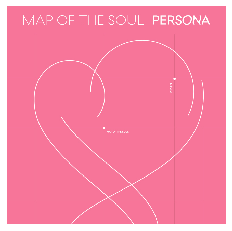

In [3]:
img_path = 'test.jpg'

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.axis("off")
plt.imshow(img)
img_shape = img.shape
print('dimensions of image:', img.shape)

# might want to resize particularly large image to save on processing time
# https://www.tutorialkart.com/opencv/python/opencv-python-resize-image/

# dimension reduction
img = img.reshape(img.shape[0]*img.shape[1], 3)
print('dimensions of flattened image:', img.shape)


## Getting k dominant colours from image

In [4]:
# set number of dominant colours to get (k)
k = 2

km = KMeans(n_clusters=k) #cluster number
km.fit(img)
# print(clt.cluster_centers_)

# clusters are the dominant colours kmeans derived## Getting k dominant colours from image
## Getting k dominant colours from image
# convert floats to int cos RGB values need to be int
colours = [c.astype("uint8").tolist() for c in km.cluster_centers_]
colours

[[246, 117, 153], [253, 234, 239]]

## Displaying Dominant Colours

As a horizontal bar with squares of each colour

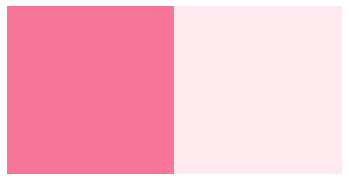

In [5]:
bar = np.zeros((50, (50*k), 3), dtype="uint8")

for c in range(0, len(colours)):
    bar[:, c*50:50*(c+1)] = colours[c]
    
plt.axis("off")
plt.imshow(bar)
plt.show()

Show dominant colours in a bar relative to each other

Code adapted from [Finding Dominant Colour on an Image](https://code.likeagirl.io/finding-dominant-colour-on-an-image-b4e075f98097)

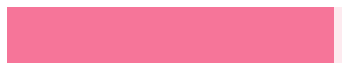

In [6]:
num_labels = np.arange(0, len(np.unique(km.labels_)) + 1)
(hist, _) = np.histogram(km.labels_, bins=num_labels)
hist = hist.astype("float")
hist /= hist.sum()
# print(hist)

bar = np.zeros((50, 300, 3), dtype="uint8")
startX = 0

for (percent, color) in zip(hist, km.cluster_centers_):
        # plot the relative percentage of each cluster
    endX = startX + (percent * 300)
    cv2.rectangle(bar, (int(startX), 0), (int(endX), 50), color.astype("uint8").tolist(), -1)
    startX = endX

plt.axis("off")
plt.imshow(bar)
plt.show()

Display where the top 3 colours appear in the picture

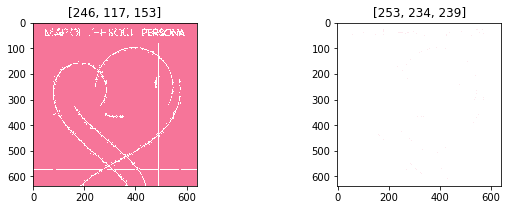

In [7]:
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, k, figsize=(10, 3))

for ax, colour in zip(axs, colours):
    dis = np.zeros(image.shape, dtype='uint8')
    dis[:,:] = [255, 255, 255]
    locs = np.where(image == colour)
    r = locs[0]
    c = locs[1]
    dis[r, c] = colour
    ax.imshow(dis)
    ax.set_title(colour)


# Determining k (number of clusters)

## 1. Elbow Method

The inflexion point is the ideal k (number of clusters)

In [ ]:
Sum_of_squared_distances = []

# set range from 1 to 5
K = range(1,6)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(img)
    Sum_of_squared_distances.append(km.inertia_)

Sum_of_squared_distances

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## 2. Silhouette Coefficient

* measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation)
* Measure has range [-1, 1]
    * near +1: sample far away from neighbouring samples
    * 0: sample on / very close to decision boundary between 2 neighbouring clusters
    * -ve: samples might have been assigned to the wrong cluster

References
* [Selecting the number of clusters with silhouette analysis on KMeans clustering](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

In [ ]:
import sklearn

# set range from 2 to 5 (cannot have 1 cluster cos silhouette score requires 2 clusters to compare)
K = range(2,6)
sil_scores = list()

# use 1% of original image (to save time)
sample_size_to_test = int(img.shape[0]*0.01)
print('sample size:', sample_size_to_test)

for k in K:
    km = KMeans(n_clusters=k)
#     km.fit(img)
    labels = km.fit_predict(img)
#     print(labels)
    sil_sc = sklearn.metrics.silhouette_score(img, labels, sample_size=sample_size_to_test, random_state=None)
    sil_scores.append(sil_sc)
    print('K =', k, ', silhouette score =', sil_sc)
    
sil_scores

In [ ]:
plt.plot(K, sil_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('Silhouette Score vs k')
plt.show()

Optimal_NumberOf_Components = K[sil_scores.index(max(sil_scores))]
print ("Optimal number of components:", Optimal_NumberOf_Components)